In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
path='F:\\2-Time Series Data Analysis-20201010T125416Z-001\\2-Time Series Data Analysis\\individual_stocks_5yr'
files=['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
stocks=pd.DataFrame()
for i in files:
    stocks=pd.concat([stocks,pd.read_csv(path+'\\'+i)])
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Analyse closing price of all the stocks

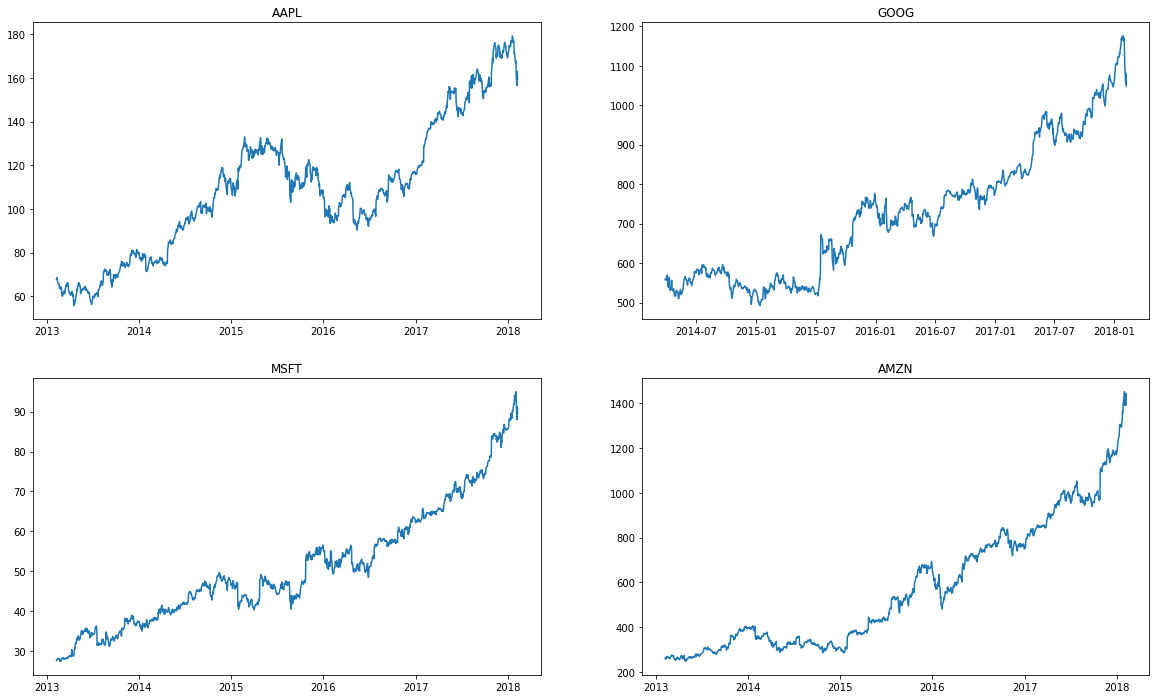

In [20]:
stocks['date']=pd.to_datetime(stocks['date'])
tech_list=stocks['Name'].unique()
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=stocks[stocks['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

## Analyze Total Volume of stock traded each day

In [24]:
import plotly.express as px
for i in tech_list:
    df=stocks[stocks['Name']==i]
    px.line(x=df['date'],y=df['volume'],title=i).show()

## Analyze Daily price change in stock

In [29]:
apple=stocks[stocks['Name']=='AAPL']
apple['daily_return']=((apple['close']-apple['open'])/apple['close'])*100
px.line(x=apple['date'],y=apple['daily_return'],title='Apple').show()

<ipython-input-29-6d35957cbf0c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Analyze monthly mean of close feature

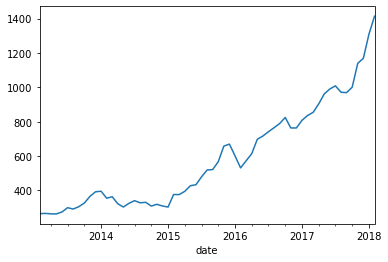

In [36]:
amazon=stocks[stocks['Name']=='AMZN']
amazon.set_index('date',inplace=True)
amazon['close'].resample('M').mean().plot()

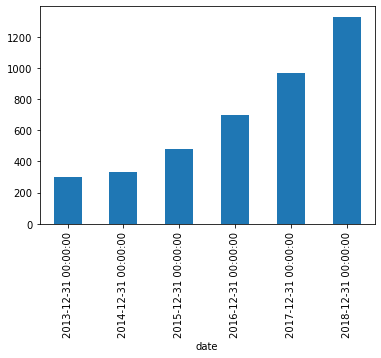

In [38]:
amazon['close'].resample('Y').mean().plot(kind='bar')

## Performing Multi-Variate Analysis

In [41]:
apple=pd.read_csv('F:\\2-Time Series Data Analysis-20201010T125416Z-001\\2-Time Series Data Analysis\\individual_stocks_5yr\\AAPL_data.csv')
amazon=pd.read_csv('F:\\2-Time Series Data Analysis-20201010T125416Z-001\\2-Time Series Data Analysis\\individual_stocks_5yr\\AMZN_data.csv')
google=pd.read_csv('F:\\2-Time Series Data Analysis-20201010T125416Z-001\\2-Time Series Data Analysis\\individual_stocks_5yr\\GOOG_data.csv')
ms=pd.read_csv('F:\\2-Time Series Data Analysis-20201010T125416Z-001\\2-Time Series Data Analysis\\individual_stocks_5yr\\MSFT_data.csv')

In [43]:
close=pd.DataFrame()
close['apple']=apple['close']
close['google']=google['close']
close['microsoft']=ms['close']
close['amazon']=amazon['close']
close.head()

,apple,google,microsoft,amazon
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24


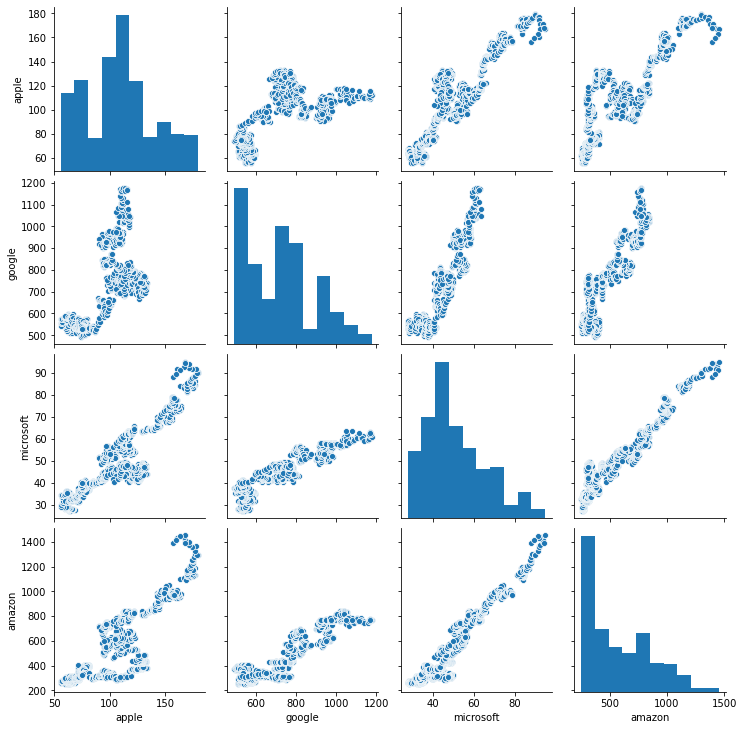

In [44]:
sns.pairplot(data=close)

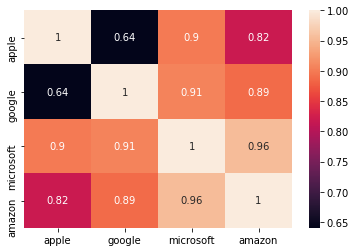

In [45]:
sns.heatmap(close.corr(),annot=True)

## Analyze Daily return of each stock and their co-relation

In [50]:
stock_change=pd.DataFrame()
stock_change['apple_change']=((apple['close']-apple['open'])/apple['close'])*100
stock_change['google_change']=((google['close']-google['open'])/google['close'])*100
stock_change['microsoft_change']=((ms['close']-ms['open'])/ms['close'])*100
stock_change['amazon_change']=((amazon['close']-amazon['open'])/amazon['close'])*100
stock_change.head()

,apple_change,google_change,microsoft_change,amazon_change
0,0.206325,-1.708269,0.725953,0.209964
1,0.714688,-0.216075,0.753769,-2.328836
2,-2.481344,-1.781065,0.000000,-0.189409
3,-0.042869,1.489879,0.356761,2.946525
4,0.443624,0.334039,0.427960,0.694548


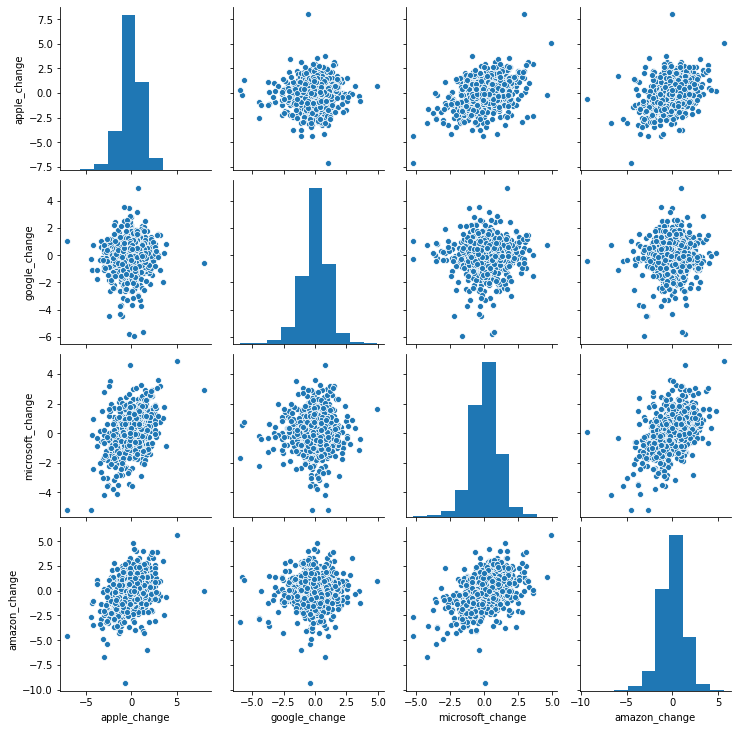

In [51]:
sns.pairplot(data=stock_change)

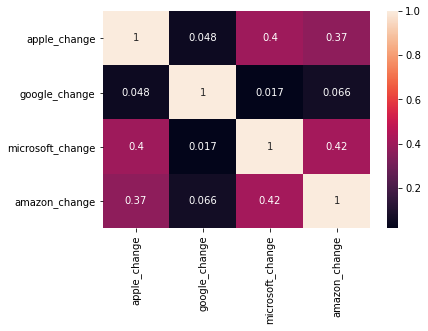

In [52]:
sns.heatmap(stock_change.corr(),annot=True)

## Value at risk analysis for Tech companies

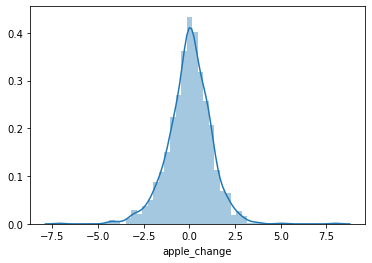

In [55]:
sns.distplot(stock_change['apple_change'])

In [60]:
stock_change['apple_change'].std()
## 68% of entire data
stock_change['apple_change'].std()*2
## 95 % of entire data
stock_change['apple_change'].std()*3
## 99.7 % of entire data

3.561413139426371

In [62]:
stock_change['apple_change'].quantile(0.1)

-1.4246644227944307

In [64]:
stock_change.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
google_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
microsoft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
amazon_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
